Import libraries:


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('cov19_cvc_cleaned.csv')
df.head()

,Unnamed: 0,Admission_Date,Discharge_DATE,Outcome,Age,Gender,Sample_Collection_Date,Treatment,Ventilated (Y/N),Red_blood_cell_distribution_width,Monocytes(%),White_blood_cell_count,Platelet_Count,Lymphocyte_Count,Neutrophils_Count,Lymphocyte_Count_Binned,Ventilated-No,Ventilated-Yes
0,1,8/10/2020,8/8/2020,Not Recovered,51,Male,8/10/2020,"Antibiotics, O2",Yes,13.2,3.3,21.00,462.00,0.44,19.43,less than 5,0,1
1,2,7/24/2020,8/5/2020,Not Recovered,65,Female,7/24/2020,"Paracetamol, Antibiotics, O2",Yes,40.0,3.0,8.79,180.66,4.39,7.56,less than 5,0,1
2,3,7/22/2020,8/8/2020,Recovered,32,Male,7/22/2020,"Antibiotics, O2",No,11.7,5.3,9.90,336.00,3.47,5.34,less than 5,1,0
3,4,7/19/2020,8/5/2020,Recovered,36,Female,7/19/2020,"Antibiotics, O2",No,13.0,5.0,9.95,240.10,0.80,8.66,less than 5,1,0
4,5,7/18/2020,8/5/2020,Recovered,46,Male,7/18/2020,"Paracetamol, Antibiotics, O2",No,31.0,3.0,14.15,236.58,7.93,13.02,5 to 11,1,0


In [8]:
df["Sample_Collection_Date"].replace(to_replace='0617/2020', value="06/17/2020", inplace=True)
df['Sample_Collection'] = pd.to_datetime(df['Sample_Collection_Date']).dt.date

In [12]:
df.head()

,Unnamed: 0,Outcome,Age,Gender,Treatment,Ventilated (Y/N),Red_blood_cell_distribution_width,Monocytes(%),White_blood_cell_count,Platelet_Count,Lymphocyte_Count,Neutrophils_Count,Lymphocyte_Count_Binned,Ventilated-No,Ventilated-Yes,Discharge,Admission,Sample_Collection
0,1,Not Recovered,51,Male,"Antibiotics, O2",Yes,13.2,3.3,21.00,462.00,0.44,19.43,less than 5,0,1,2020-08-08,2020-08-10,2020-08-10
1,2,Not Recovered,65,Female,"Paracetamol, Antibiotics, O2",Yes,40.0,3.0,8.79,180.66,4.39,7.56,less than 5,0,1,2020-08-05,2020-07-24,2020-07-24
2,3,Recovered,32,Male,"Antibiotics, O2",No,11.7,5.3,9.90,336.00,3.47,5.34,less than 5,1,0,2020-08-08,2020-07-22,2020-07-22
3,4,Recovered,36,Female,"Antibiotics, O2",No,13.0,5.0,9.95,240.10,0.80,8.66,less than 5,1,0,2020-08-05,2020-07-19,2020-07-19
4,5,Recovered,46,Male,"Paracetamol, Antibiotics, O2",No,31.0,3.0,14.15,236.58,7.93,13.02,5 to 11,1,0,2020-08-05,2020-07-18,2020-07-18


In [10]:
df.drop(["Admission_Date","Discharge_DATE","Sample_Collection_Date"], axis = 1, inplace=True)

<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns Using Visualization</h2>


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [14]:

# list the data types for each column
print(df.dtypes)

Unnamed: 0                             int64
Outcome                               object
Age                                    int64
Gender                                object
Treatment                             object
Ventilated (Y/N)                      object
Red_blood_cell_distribution_width    float64
Monocytes(%)                         float64
White_blood_cell_count               float64
Platelet_Count                       float64
Lymphocyte_Count                     float64
Neutrophils_Count                    float64
Lymphocyte_Count_Binned               object
Ventilated-No                          int64
Ventilated-Yes                         int64
Discharge                             object
Admission                             object
Sample_Collection                     object
dtype: object


In [15]:
df.corr()

,Unnamed: 0,Age,Red_blood_cell_distribution_width,Monocytes(%),White_blood_cell_count,Platelet_Count,Lymphocyte_Count,Neutrophils_Count,Ventilated-No,Ventilated-Yes
Unnamed: 0,1.000000,-0.172279,-0.135893,-0.300878,-0.156680,-0.433765,0.037795,-0.099210,0.404539,-0.404539
Age,-0.172279,1.000000,0.126425,0.150397,-0.060969,-0.158683,0.010463,0.134431,-0.513368,0.513368
Red_blood_cell_distribution_width,-0.135893,0.126425,1.000000,-0.128371,0.063359,-0.065350,0.458238,0.330845,-0.320077,0.320077
Monocytes(%),-0.300878,0.150397,-0.128371,1.000000,-0.305091,-0.051753,-0.356333,-0.286704,-0.243414,0.243414
White_blood_cell_count,-0.156680,-0.060969,0.063359,-0.305091,1.000000,0.199980,0.375280,0.438633,-0.054333,0.054333
Platelet_Count,-0.433765,-0.158683,-0.065350,-0.051753,0.199980,1.000000,0.016676,0.296369,0.114119,-0.114119
Lymphocyte_Count,0.037795,0.010463,0.458238,-0.356333,0.375280,0.016676,1.000000,0.797521,-0.027449,0.027449
Neutrophils_Count,-0.099210,0.134431,0.330845,-0.286704,0.438633,0.296369,0.797521,1.000000,-0.206399,0.206399
Ventilated-No,0.404539,-0.513368,-0.320077,-0.243414,-0.054333,0.114119,-0.027449,-0.206399,1.000000,-1.000000
Ventilated-Yes,-0.404539,0.513368,0.320077,0.243414,0.054333,-0.114119,0.027449,0.206399,-1.000000,1.000000


In [28]:
df[['Red_blood_cell_distribution_width','White_blood_cell_count','Platelet_Count','Neutrophils_Count','Lymphocyte_Count']].corr()

,Red_blood_cell_distribution_width,White_blood_cell_count,Platelet_Count,Neutrophils_Count,Lymphocyte_Count
Red_blood_cell_distribution_width,1.000000,0.063359,-0.065350,0.330845,0.458238
White_blood_cell_count,0.063359,1.000000,0.199980,0.438633,0.375280
Platelet_Count,-0.065350,0.199980,1.000000,0.296369,0.016676
Neutrophils_Count,0.330845,0.438633,0.296369,1.000000,0.797521
Lymphocyte_Count,0.458238,0.375280,0.016676,0.797521,1.000000


<h3>Positive Linear Relationship</h4>


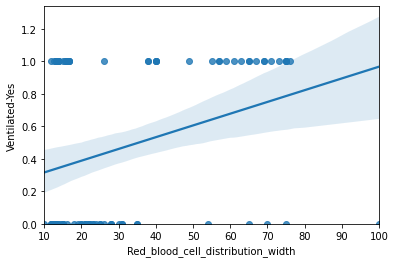

In [22]:
sns.regplot(y="Ventilated-Yes", x="Red_blood_cell_distribution_width", data=df)
plt.ylim(0,)
plt.show()

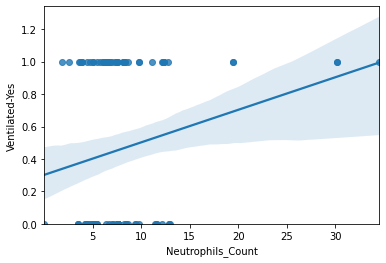

In [24]:
sns.regplot(y="Ventilated-Yes", x="Neutrophils_Count", data=df)
plt.ylim(0,)
plt.show()

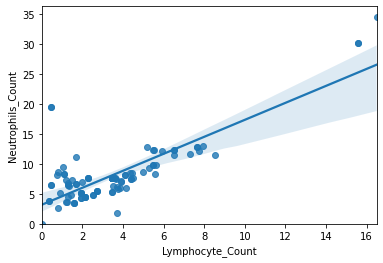

In [29]:
sns.regplot(y="Neutrophils_Count", x="Lymphocyte_Count", data=df)
plt.ylim(0,)
plt.show()

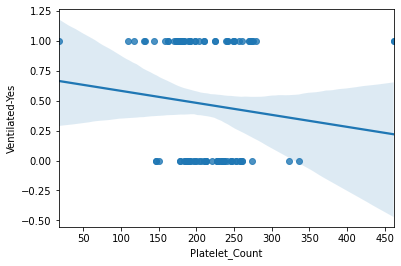

In [31]:
sns.regplot(x="Platelet_Count", y="Ventilated-Yes", data=df)

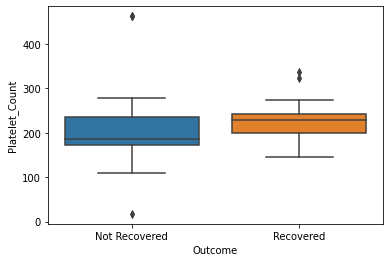

In [32]:
sns.boxplot(x="Outcome", y="Platelet_Count", data=df)


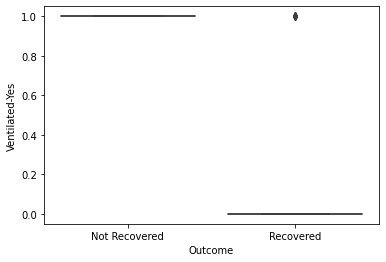

In [37]:
sns.boxplot(x="Outcome", y="Ventilated-Yes", data=df)

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>


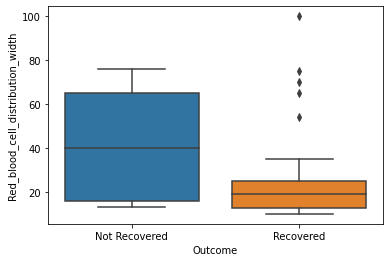

In [34]:
sns.boxplot(x="Outcome", y="Red_blood_cell_distribution_width", data=df)

In [38]:
dummy_variable_1 = pd.get_dummies(df["Outcome"])
dummy_variable_1.head()

,Not Recovered,Recovered
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [ ]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

In [40]:
# drop original column "fuel-type" from "df"
df.drop("Not Recovered", axis = 1, inplace=True)

In [41]:
df.head()

,Unnamed: 0,Outcome,Age,Gender,Treatment,Ventilated (Y/N),Red_blood_cell_distribution_width,Monocytes(%),White_blood_cell_count,Platelet_Count,Lymphocyte_Count,Neutrophils_Count,Lymphocyte_Count_Binned,Ventilated-No,Ventilated-Yes,Discharge,Admission,Sample_Collection,Recovered
0,1,Not Recovered,51,Male,"Antibiotics, O2",Yes,13.2,3.3,21.00,462.00,0.44,19.43,less than 5,0,1,2020-08-08,2020-08-10,2020-08-10,0
1,2,Not Recovered,65,Female,"Paracetamol, Antibiotics, O2",Yes,40.0,3.0,8.79,180.66,4.39,7.56,less than 5,0,1,2020-08-05,2020-07-24,2020-07-24,0
2,3,Recovered,32,Male,"Antibiotics, O2",No,11.7,5.3,9.90,336.00,3.47,5.34,less than 5,1,0,2020-08-08,2020-07-22,2020-07-22,1
3,4,Recovered,36,Female,"Antibiotics, O2",No,13.0,5.0,9.95,240.10,0.80,8.66,less than 5,1,0,2020-08-05,2020-07-19,2020-07-19,1
4,5,Recovered,46,Male,"Paracetamol, Antibiotics, O2",No,31.0,3.0,14.15,236.58,7.93,13.02,5 to 11,1,0,2020-08-05,2020-07-18,2020-07-18,1


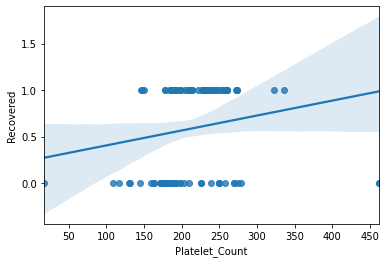

In [42]:
sns.regplot(x="Platelet_Count", y="Recovered", data=df)

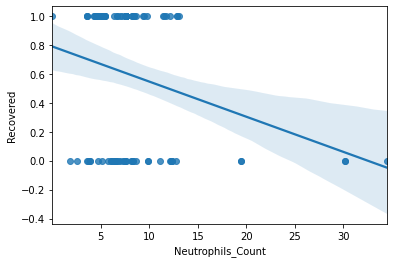

In [44]:
sns.regplot(x="Neutrophils_Count", y="Recovered", data=df)

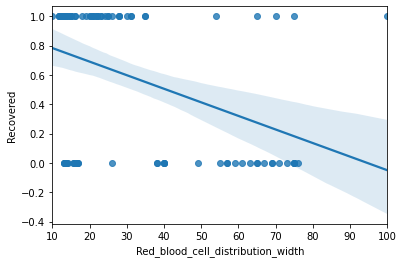

In [45]:
sns.regplot(x="Red_blood_cell_distribution_width", y="Recovered", data=df)

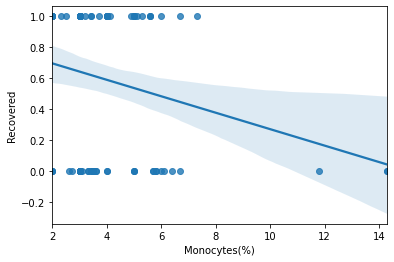

In [46]:
sns.regplot(x="Monocytes(%)", y="Recovered", data=df)

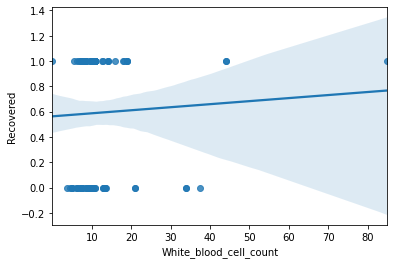

In [47]:
sns.regplot(x="White_blood_cell_count", y="Recovered", data=df)

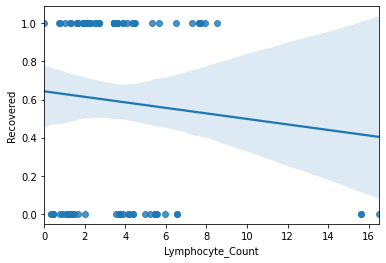

In [48]:
sns.regplot(x="Lymphocyte_Count", y="Recovered", data=df)

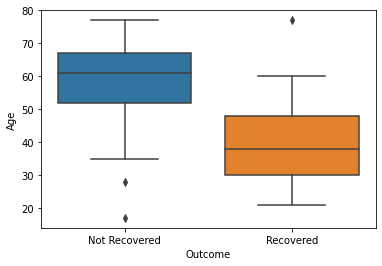

In [49]:
sns.boxplot(x="Outcome", y="Age", data=df)

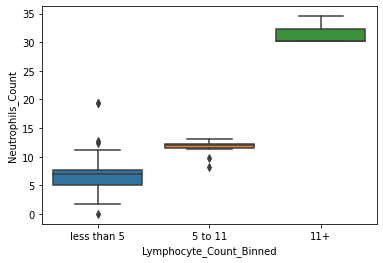

In [53]:
sns.boxplot(x="Lymphocyte_Count_Binned", y="Neutrophils_Count", data=df)

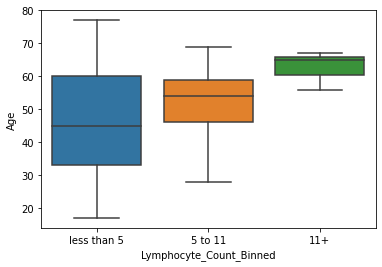

In [100]:
sns.boxplot(x="Lymphocyte_Count_Binned", y="Age", data=df)

<p>Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.</p>


<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>


In [54]:
df.describe()

,Unnamed: 0,Age,Red_blood_cell_distribution_width,Monocytes(%),White_blood_cell_count,Platelet_Count,Lymphocyte_Count,Neutrophils_Count,Ventilated-No,Ventilated-Yes,Recovered
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,52.000000,47.262136,30.691262,3.939806,12.036505,216.367379,3.520971,8.176019,0.533981,0.466019,0.592233
std,29.877528,15.749859,22.193746,2.088171,10.258011,57.102773,2.909417,5.158653,0.501283,0.501283,0.493822
min,1.000000,17.000000,10.000000,2.000000,0.010000,17.400000,0.000000,0.010000,0.000000,0.000000,0.000000
25%,26.500000,35.000000,13.650000,3.000000,7.545000,184.000000,1.600000,5.340000,0.000000,0.000000,0.000000
50%,52.000000,46.000000,21.000000,3.000000,9.570000,213.400000,3.470000,7.590000,1.000000,0.000000,1.000000
75%,77.500000,60.000000,40.000000,4.950000,12.690000,241.500000,4.360000,8.535000,1.000000,1.000000,1.000000
max,103.000000,77.000000,100.000000,14.300000,85.000000,462.000000,16.500000,34.510000,1.000000,1.000000,1.000000


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:


In [56]:
df.describe(include=['object'])

,Outcome,Gender,Treatment,Ventilated (Y/N),Lymphocyte_Count_Binned,Discharge,Admission,Sample_Collection
count,103,103,103,103,103,103,103,103
unique,2,2,10,2,3,50,54,55
top,Recovered,Male,"Antibiotics, O2",No,less than 5,2020-08-05,2020-07-14,2020-07-14
freq,61,55,68,55,87,10,6,6


<h2 id="basic_grouping">4. Grouping</h2>


In [59]:
df_group_one = df[['Age','Neutrophils_Count','Recovered']]

We can then calculate the average price for each of the different categories of data.


In [60]:
# grouping results
df_group_one = df_group_one.groupby(['Recovered'],as_index=False).mean()
df_group_one

,Recovered,Age,Neutrophils_Count
0,0,57.952381,9.748810
1,1,39.901639,7.093115


In [61]:
# grouping results
df_gptest = df[['Age','Lymphocyte_Count_Binned','Recovered']]
grouped_test1 = df_gptest.groupby(['Lymphocyte_Count_Binned','Recovered'],as_index=False).mean()
grouped_test1

,Lymphocyte_Count_Binned,Recovered,Age
0,11+,0,62.666667
1,5 to 11,0,61.600000
2,5 to 11,1,46.500000
3,less than 5,0,57.000000
4,less than 5,1,38.905660


In [63]:
df_gptest[["Lymphocyte_Count_Binned","Recovered"]].groupby("Lymphocyte_Count_Binned").sum()

,Recovered
Lymphocyte_Count_Binned,
11+,0
5 to 11,8
less than 5,53


In [ ]:
dummy_variable_1 = pd.get_dummies(df["Outcome"])

In [65]:
dummy_variable_1.drop("Recovered", axis = 1, inplace=True)

In [67]:
df = pd.concat([df, dummy_variable_1], axis=1)

In [69]:
df[["Lymphocyte_Count_Binned","Not Recovered"]].groupby("Lymphocyte_Count_Binned").sum()

,Not Recovered
Lymphocyte_Count_Binned,
11+,3
5 to 11,5
less than 5,34


In [70]:
grouped_pivot = grouped_test1.pivot(index='Recovered',columns='Lymphocyte_Count_Binned')
grouped_pivot

Age                    
Lymphocyte_Count_Binned        11+ 5 to 11 less than 5
Recovered                                             
0                        62.666667    61.6    57.00000
1                              NaN    46.5    38.90566

In [71]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

Age                    
Lymphocyte_Count_Binned        11+ 5 to 11 less than 5
Recovered                                             
0                        62.666667    61.6    57.00000
1                         0.000000    46.5    38.90566

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline 

Let's use a heat map to visualize the relationship between Body Style vs Price.


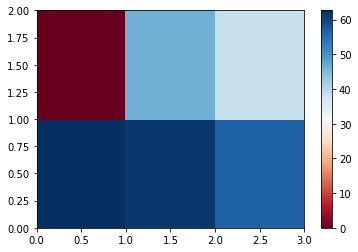

In [73]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

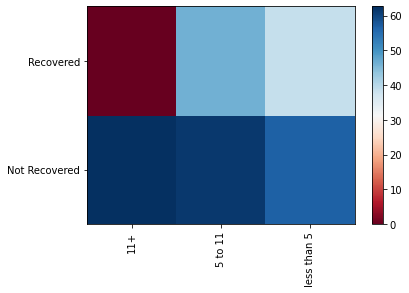

In [76]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = ['Not Recovered','Recovered']

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h2 id="correlation_causation">5. Correlation and Causation</h2>


In [77]:

df.corr()

,Unnamed: 0,Age,Red_blood_cell_distribution_width,Monocytes(%),White_blood_cell_count,Platelet_Count,Lymphocyte_Count,Neutrophils_Count,Ventilated-No,Ventilated-Yes,Recovered,Not Recovered
Unnamed: 0,1.000000,-0.172279,-0.135893,-0.300878,-0.156680,-0.433765,0.037795,-0.099210,0.404539,-0.404539,0.312972,-0.312972
Age,-0.172279,1.000000,0.126425,0.150397,-0.060969,-0.158683,0.010463,0.134431,-0.513368,0.513368,-0.565965,0.565965
Red_blood_cell_distribution_width,-0.135893,0.126425,1.000000,-0.128371,0.063359,-0.065350,0.458238,0.330845,-0.320077,0.320077,-0.415751,0.415751
Monocytes(%),-0.300878,0.150397,-0.128371,1.000000,-0.305091,-0.051753,-0.356333,-0.286704,-0.243414,0.243414,-0.224643,0.224643
White_blood_cell_count,-0.156680,-0.060969,0.063359,-0.305091,1.000000,0.199980,0.375280,0.438633,-0.054333,0.054333,0.049881,-0.049881
Platelet_Count,-0.433765,-0.158683,-0.065350,-0.051753,0.199980,1.000000,0.016676,0.296369,0.114119,-0.114119,0.185918,-0.185918
Lymphocyte_Count,0.037795,0.010463,0.458238,-0.356333,0.375280,0.016676,1.000000,0.797521,-0.027449,0.027449,-0.085292,0.085292
Neutrophils_Count,-0.099210,0.134431,0.330845,-0.286704,0.438633,0.296369,0.797521,1.000000,-0.206399,0.206399,-0.254222,0.254222
Ventilated-No,0.404539,-0.513368,-0.320077,-0.243414,-0.054333,0.114119,-0.027449,-0.206399,1.000000,-1.000000,0.888220,-0.888220
Ventilated-Yes,-0.404539,0.513368,0.320077,0.243414,0.054333,-0.114119,0.027449,0.206399,-1.000000,1.000000,-0.888220,0.888220


In [78]:
from scipy import stats

Recovery

In [79]:
pearson_coef, p_value = stats.pearsonr(df['Age'], df['Recovered'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.5659645647105932  with a P-value of P = 4.665403808890849e-10


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between age and recovery is statistically significant, although the linear relationship isn't extremely strong (~0.565).</p>


Ventilated

In [101]:
pearson_coef, p_value = stats.pearsonr(df['Age'], df['Ventilated-Yes'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5133679132384166  with a P-value of P = 2.9378166148721056e-08


Recovery

In [81]:
pearson_coef, p_value = stats.pearsonr(df['Lymphocyte_Count'], df['Recovered'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

if p_value<0.001:
    print("correlation is strong")
elif p_value<0.05:
    print("correlation is moderate")
elif p_value<0.1:
    print("correlation is weak")
else:
    print("no correlation")

The Pearson Correlation Coefficient is -0.08529154436119511  with a P-value of P =  0.3916588729164761
no correlation


Ventilated

In [102]:
pearson_coef, p_value = stats.pearsonr(df['Lymphocyte_Count'], df['Ventilated-Yes'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

if p_value<0.001:
    print("correlation is strong")
elif p_value<0.05:
    print("correlation is moderate")
elif p_value<0.1:
    print("correlation is weak")
else:
    print("no correlation")

The Pearson Correlation Coefficient is 0.02744936287339627  with a P-value of P =  0.7831375357250748
no correlation


Recovery

In [82]:
pearson_coef, p_value = stats.pearsonr(df['Neutrophils_Count'], df['Recovered'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

if p_value<0.001:
    print("correlation is strong")
elif p_value<0.05:
    print("correlation is moderate")
elif p_value<0.1:
    print("correlation is weak")
else:
    print("no correlation")

The Pearson Correlation Coefficient is -0.2542217335325273  with a P-value of P =  0.009561357675419801
correlation is moderate


Ventilated

In [103]:
pearson_coef, p_value = stats.pearsonr(df['Neutrophils_Count'], df['Ventilated-Yes'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

if p_value<0.001:
    print("correlation is strong")
elif p_value<0.05:
    print("correlation is moderate")
elif p_value<0.1:
    print("correlation is weak")
else:
    print("no correlation")

The Pearson Correlation Coefficient is 0.20639864994813817  with a P-value of P =  0.03646250007845696
correlation is moderate


Recovery


In [83]:
pearson_coef, p_value = stats.pearsonr(df['Platelet_Count'], df['Recovered'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

if p_value<0.001:
    print("correlation is strong")
elif p_value<0.05:
    print("correlation is moderate")
elif p_value<0.1:
    print("correlation is weak")
else:
    print("no correlation")

The Pearson Correlation Coefficient is 0.18591844623223194  with a P-value of P = 0.060071721129428636
correlation is weak


Ventilated

In [105]:
pearson_coef, p_value = stats.pearsonr(df['Platelet_Count'], df['Ventilated-Yes'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

if p_value<0.001:
    print("correlation is strong")
elif p_value<0.05:
    print("correlation is moderate")
elif p_value<0.1:
    print("correlation is weak")
else:
    print("no correlation")

The Pearson Correlation Coefficient is -0.11411868697359377  with a P-value of P = 0.2510520766084837
no correlation


Recovery

In [84]:
pearson_coef, p_value = stats.pearsonr(df['White_blood_cell_count'], df['Recovered'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

if p_value<0.001:
    print("correlation is strong")
elif p_value<0.05:
    print("correlation is moderate")
elif p_value<0.1:
    print("correlation is weak")
else:
    print("no correlation")

The Pearson Correlation Coefficient is 0.04988089125162958  with a P-value of P =  0.6168151357084469
no correlation


Ventilated

In [106]:
pearson_coef, p_value = stats.pearsonr(df['White_blood_cell_count'], df['Ventilated-Yes'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

if p_value<0.001:
    print("correlation is strong")
elif p_value<0.05:
    print("correlation is moderate")
elif p_value<0.1:
    print("correlation is weak")
else:
    print("no correlation")

The Pearson Correlation Coefficient is 0.054333067619096564  with a P-value of P =  0.585689109402749
no correlation


Recovery


In [85]:
pearson_coef, p_value = stats.pearsonr(df['Monocytes(%)'], df['Recovered'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

if p_value<0.001:
    print("correlation is strong")
elif p_value<0.05:
    print("correlation is moderate")
elif p_value<0.1:
    print("correlation is weak")
else:
    print("no correlation")

The Pearson Correlation Coefficient is -0.22464289546739674  with a P-value of P = 0.02253113643118112
correlation is moderate


Ventilated

In [107]:
pearson_coef, p_value = stats.pearsonr(df['Monocytes(%)'], df['Recovered'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

if p_value<0.001:
    print("correlation is strong")
elif p_value<0.05:
    print("correlation is moderate")
elif p_value<0.1:
    print("correlation is weak")
else:
    print("no correlation")

The Pearson Correlation Coefficient is -0.22464289546739674  with a P-value of P = 0.02253113643118112
correlation is moderate


Recovery

In [87]:
pearson_coef, p_value = stats.pearsonr(df['Red_blood_cell_distribution_width'], df['Recovered'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

if p_value<0.001:
    print("correlation is strong")
elif p_value<0.05:
    print("correlation is moderate")
elif p_value<0.1:
    print("correlation is weak")
else:
    print("no correlation")

The Pearson Correlation Coefficient is -0.41575130585956876  with a P-value of P =   1.2578333343385435e-05
correlation is strong


Ventilated

In [109]:
pearson_coef, p_value = stats.pearsonr(df['Red_blood_cell_distribution_width'], df['Ventilated-Yes'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

if p_value<0.001:
    print("correlation is strong")
elif p_value<0.05:
    print("correlation is moderate")
elif p_value<0.1:
    print("correlation is weak")
else:
    print("no correlation")

The Pearson Correlation Coefficient is 0.3200773949794996  with a P-value of P =   0.0009809099295529913
correlation is strong


Recovery vs Ventilated


In [88]:
pearson_coef, p_value = stats.pearsonr(df['Ventilated-Yes'], df['Recovered'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

if p_value<0.001:
    print("correlation is strong")
elif p_value<0.05:
    print("correlation is moderate")
elif p_value<0.1:
    print("correlation is weak")
else:
    print("no correlation")

The Pearson Correlation Coefficient is -0.888219807384134  with a P-value of P =  6.794254676633803e-36
correlation is strong


In [91]:
pearson_coef, p_value = stats.pearsonr(df['Ventilated-No'], df['Recovered'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

if p_value<0.001:
    print("correlation is strong")
elif p_value<0.05:
    print("correlation is moderate")
elif p_value<0.1:
    print("correlation is weak")
else:
    print("no correlation")

The Pearson Correlation Coefficient is 0.888219807384134  with a P-value of P =  6.794254676633803e-36
correlation is strong


<h2 id="anova">6. ANOVA</h2>


In [93]:
grouped_test2=df[['Lymphocyte_Count_Binned', 'Recovered']].groupby(['Lymphocyte_Count_Binned'])
grouped_test2.head()

,Lymphocyte_Count_Binned,Recovered
0,less than 5,0
1,less than 5,0
2,less than 5,1
3,less than 5,1
4,5 to 11,1
5,less than 5,0
7,5 to 11,0
14,5 to 11,0
15,5 to 11,0
28,11+,0


We can obtain the values of the method group using the method "get_group".


In [94]:
grouped_test2.get_group('less than 5')['Recovered']

0      0
1      0
2      1
3      1
5      0
      ..
96     1
99     1
100    1
101    1
102    1
Name: Recovered, Length: 87, dtype: uint8

In [95]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('less than 5')['Recovered'], grouped_test2.get_group('5 to 11')['Recovered'], grouped_test2.get_group('11+')['Recovered'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 2.278771328299387 , P = 0.107703945116361


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately.


In [96]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('less than 5')['Recovered'], grouped_test2.get_group('5 to 11')['Recovered'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 0.001784732030030453 , P = 0.9663884755337863


Let's examine the other groups.


In [97]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('11+')['Recovered'], grouped_test2.get_group('5 to 11')['Recovered'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 4.200000000000001 , P = 0.05964616576002253


In [98]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('less than 5')['Recovered'], grouped_test2.get_group('11+')['Recovered'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 4.572549019607841 , P = 0.03525948267015065


In [110]:
# grouping results
df_gptest = df[['Age','Ventilated-Yes','Recovered']]
grouped_test1 = df_gptest.groupby(['Ventilated-Yes','Recovered'],as_index=False).mean()
grouped_test1

,Ventilated-Yes,Recovered,Age
0,0,1,39.745455
1,1,0,57.952381
2,1,1,41.333333


In [111]:
grouped_pivot = grouped_test1.pivot(index='Recovered',columns='Ventilated-Yes')
grouped_pivot

Age           
Ventilated-Yes          0          1
Recovered                           
0                     NaN  57.952381
1               39.745455  41.333333

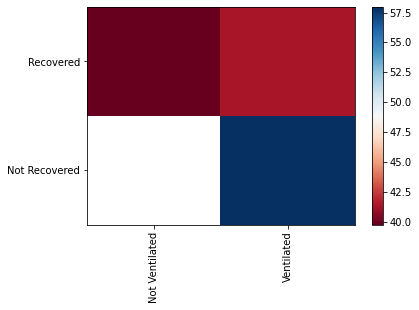

In [113]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = ['Not Ventilated','Ventilated']
col_labels = ['Not Recovered','Recovered']

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h3>Conclusion: Important Variables</h3>


<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the recovery . We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>Red Blood Cell Width</li>
    <li>Ventilated</li>
    <li>Age</li>
</ul>

Categorical variables:

<ul>
    <li>None</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>


Text(0.5, 1.0, 'Age')

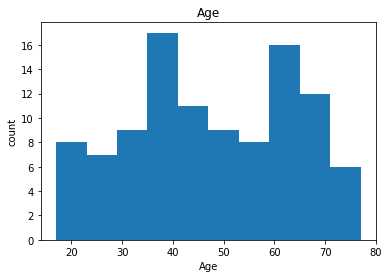

In [114]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Age"])

# set x/y labels and plot title
plt.pyplot.xlabel("Age")
plt.pyplot.ylabel("count")
plt.pyplot.title("Age")

In [119]:
bins = np.linspace(min(df["Age"]), max(df["Age"]), 6)
bins

array([17., 29., 41., 53., 65., 77.])

In [124]:
bins1= np.array([17., 35., 40., 57., 70., 77.])

In [125]:
group_names = ['35 less', '35-40', '40-57', '57-70', '70+']

In [127]:
df.drop('Age-Binned', axis=1, inplace= True)

In [129]:
df['Age-Binned'] = pd.cut(df['Age'], bins1, labels=group_names, include_lowest=True )
df[['Age','Age-Binned']].head()

,Age,Age-Binned
0,51,40-57
1,65,57-70
2,32,35 less
3,36,35-40
4,46,40-57


In [130]:
df["Age-Binned"].value_counts()

57-70      29
40-57      27
35 less    27
35-40      14
70+         6
Name: Age-Binned, dtype: int64

In [135]:
df_age= df[["Age-Binned", "Recovered"]].groupby("Age-Binned").sum()

In [133]:
df[["Age-Binned", "Not Recovered"]].groupby("Age-Binned").sum()

,Not Recovered
Age-Binned,
35 less,4
35-40,1
40-57,12
57-70,20
70+,5


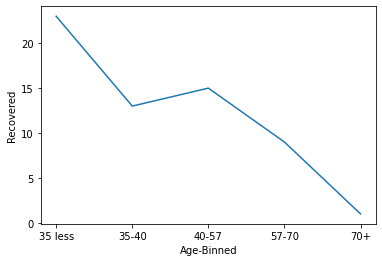

In [137]:
sns.lineplot(data=df_age, x="Age-Binned", y="Recovered")

In [138]:
df.to_csv('cov19_cvc_cleaned2.csv')